##### import all the algorithms

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
df['House_price'] = data.target

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
df.isna().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
House_price    0
dtype: int64

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


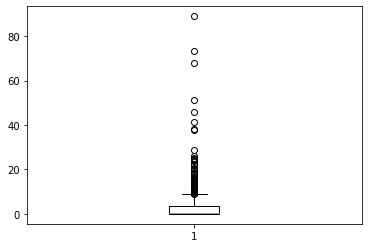

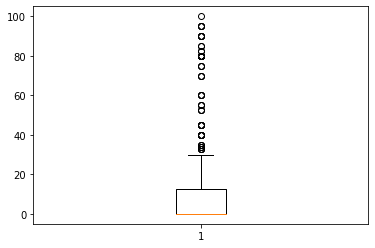

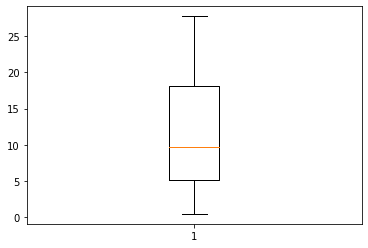

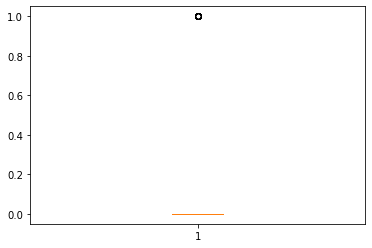

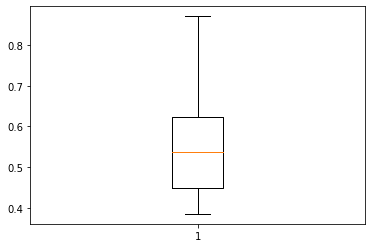

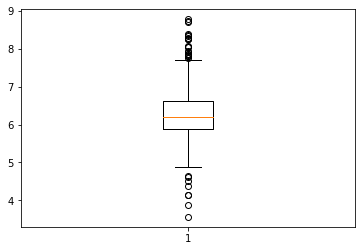

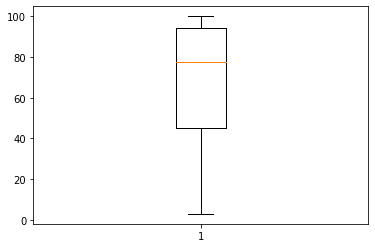

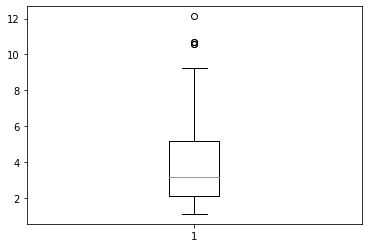

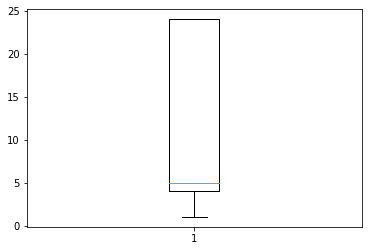

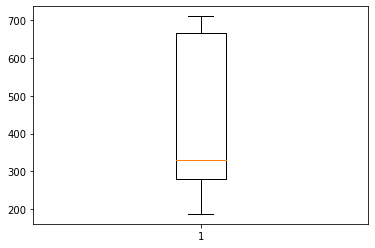

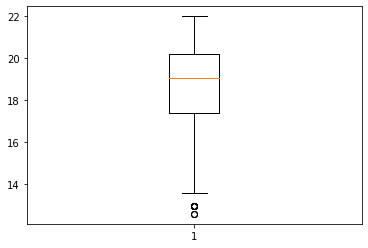

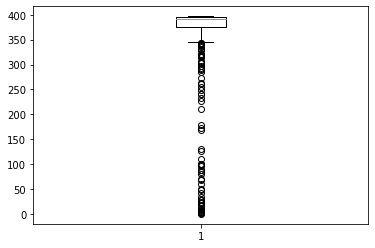

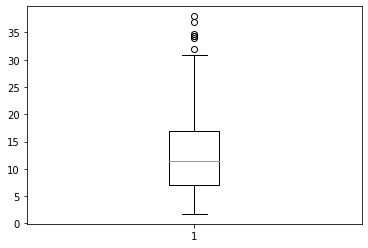

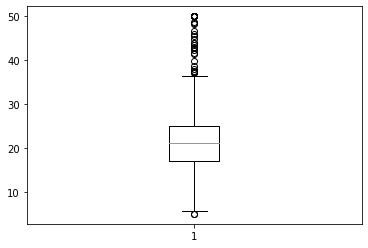

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df:
    plt.boxplot(df[i])
    plt.show()

In [9]:
x = df.drop(['House_price'],axis=1).values
y = df['House_price'].values

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4882)

In [11]:
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (354, 13) (152, 13)


In [12]:
from sklearn.linear_model import Lasso

In [13]:
model = Lasso(0.001)

In [14]:
model.fit(x_train,y_train)

Lasso(alpha=0.001)

In [15]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [16]:
print(r2_score(y_test,model.predict(x_test)))

0.7126296588760841


In [17]:
print(r2_score(y_train,model.predict(x_train)))

0.748922456878635


In [18]:
print(mean_squared_error(y_test,model.predict(x_test)))

21.523661923885896


In [19]:
print(mean_squared_error(y_train,model.predict(x_train)))

22.218923131930097


Text(0.5, 1.0, 'Actual vs Predicted')

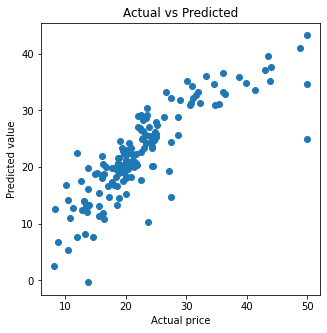

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,model.predict(x_test))
plt.xlabel('Actual price')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted')

Text(0.5, 1.0, 'Actual vs Predicted')

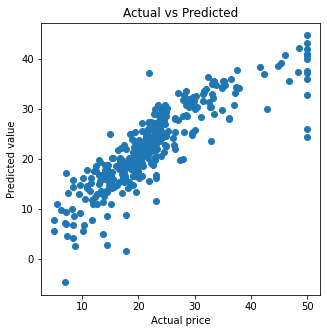

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(y_train,model.predict(x_train))
plt.xlabel('Actual price')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted')

In [22]:
pd.DataFrame({'Actual':y_train,'Predicted':model.predict(x_train).round(1)})


,Actual,Predicted
0,25.0,24.6
1,15.4,14.3
2,25.3,25.5
3,14.6,18.8
4,10.2,5.6
...,...,...
349,23.8,26.7
350,15.0,24.9
351,19.9,17.7
352,29.8,25.3


In [23]:
pd.DataFrame({'Actual':y_test,'Predicted':model.predict(x_test).round(1)})

,Actual,Predicted
0,38.7,35.8
1,17.2,14.7
2,23.3,28.6
3,27.5,24.4
4,12.7,17.6
...,...,...
147,23.5,30.4
148,25.2,27.4
149,22.6,22.7
150,36.4,32.9


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
model = Lasso()

In [26]:
grid = dict()

In [27]:
grid['alpha'] = np.arange(0, 1, 0.001)

In [28]:
search = GridSearchCV(model,grid,cv=5)

In [29]:
results = search.fit(x_train,y_train)

In [30]:
results.best_params_

{'alpha': 0.001}

### cv = cross validation
cv = 5
means your data in splitted into 5 equal parts and 1 for testing and another 
for training and again and again its shuffling.

#### Ridge regressions

In [31]:
from sklearn.linear_model import Ridge

In [32]:
model_ridge = Ridge(alpha=0.021)

In [33]:
model_ridge.fit(x_train,y_train)

Ridge(alpha=0.021)

In [34]:
print(r2_score(y_test,model_ridge.predict(x_test)))

0.7126433075532677


In [35]:
print(r2_score(y_train,model_ridge.predict(x_train)))

0.7489219841797738


Text(0.5, 1.0, 'Actual vs Predicted')

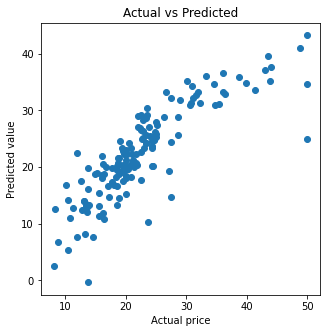

In [36]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,model_ridge.predict(x_test))
plt.xlabel('Actual price')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted')

Text(0.5, 1.0, 'Actual vs Predicted')

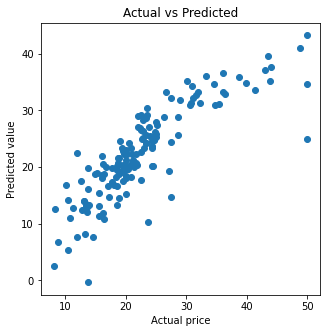

In [37]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,model_ridge.predict(x_test))
plt.xlabel('Actual price')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted')

In [38]:
pd.DataFrame({'actual':y_test,"predicted":model_ridge.predict(x_test).round(1)}).head(10)                                     

,actual,predicted
0,38.7,35.8
1,17.2,14.7
2,23.3,28.6
3,27.5,24.4
4,12.7,17.6
5,18.5,19.6
6,50.0,34.7
7,31.1,32.1
8,18.8,20.7
9,21.7,22.3


In [39]:
pd.DataFrame({'actual':y_train,"predicted":model_ridge.predict(x_train).round(1)}).head(10)                                     

,actual,predicted
0,25.0,24.6
1,15.4,14.3
2,25.3,25.5
3,14.6,18.8
4,10.2,5.6
5,21.2,23.2
6,27.1,27.8
7,33.2,32.3
8,8.5,6.8
9,23.7,27.2


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
model_ridge = Ridge()

In [42]:
grid1=dict()

In [43]:
grid1['alpha']=np.arange(0,1,0.001)

In [44]:
search = GridSearchCV(model_ridge,grid1,cv=5)

In [45]:
results = search.fit(x_train,y_train)

In [46]:
results.best_params_

{'alpha': 0.021}

In [47]:
results.best_score_

0.7095638745426308

#### Elastic net( L1 + L2)

In [48]:
from sklearn.linear_model import ElasticNet

In [49]:
elastic = ElasticNet(alpha = 0.0)

In [50]:
elastic.fit(x_train,y_train)

ElasticNet(alpha=0.0)

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid = dict()
grid['alpha'] = np.arange(0,1,0.01)

In [53]:
search = GridSearchCV(elastic,grid,cv=10)

In [54]:
results = search.fit(x_train,y_train)

In [55]:
results.best_params_

{'alpha': 0.0}

In [56]:
print(r2_score(y_test,elastic.predict(x_test)))

0.7125259242502294


In [57]:
print(r2_score(y_train,elastic.predict(x_train)))

0.7489266353787702


### conclusion : we can use ridge , lasso and elastic net but before you have to change the value of alpha

In [58]:
### when we use standard scaler
# after splititing the data into train_test_split then you will use standard scaler
# from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit(x_train)
#x_train = sc.transform(x_train)
#y_train = sc.transform(y_train)

In [59]:
#stand, min, robust it will compress your data